In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import numpy as np

In [96]:
# Load ECG data from CSV file
ecg_data = pd.read_csv("C:\\Users\\ARUZ\\Downloads\\sam_ECG.csv")

# Access time and ECG voltage columns
time = ecg_data["time"]
ecg = ecg_data["ecg"]
print(ecg.isnull().sum())

0


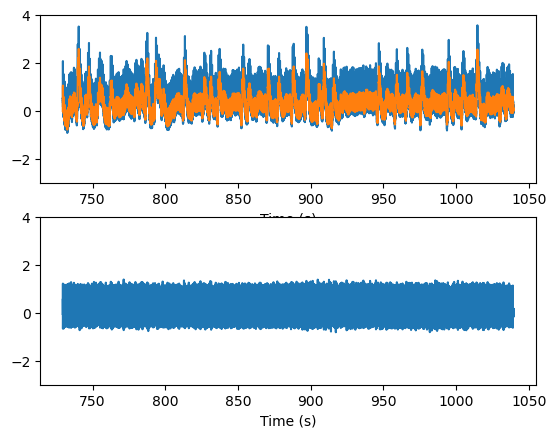

In [111]:
from scipy.signal import butter, sosfilt, lfilter

# Sampling frequency (adjusted based on data)
fs = 100  # Hz

# Butterworth, first order, 0.5 Hz cutoff
lowpass = butter(1, 0.5, btype='lowpass', fs=fs, output='sos')
lowpassed = sosfilt(lowpass, ecg)
highpassed = ecg - lowpassed

fig, axs = plt.subplots(2, 1)
axs[0].plot(time, ecg)
axs[0].plot(time, lowpassed)
axs[1].plot(time, highpassed)
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[0].set_ylim([-3, +4])
axs[1].set_ylim([-3, +4])
plt.show()

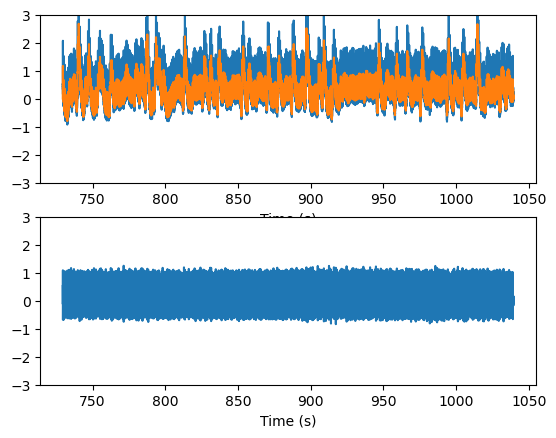

In [112]:
alpha = 1/25 # depends on fs and desired cutoff frequency (tested with different values)
lowpassed = lfilter([alpha], [1, -(1-alpha)], ecg)
highpassed = ecg - lowpassed

fig, axs = plt.subplots(2, 1)
axs[0].plot(time, ecg)
axs[0].plot(time, lowpassed)
axs[1].plot(time, highpassed)
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[0].set_ylim([-3, +3])
axs[1].set_ylim([-3, +3])
plt.show()

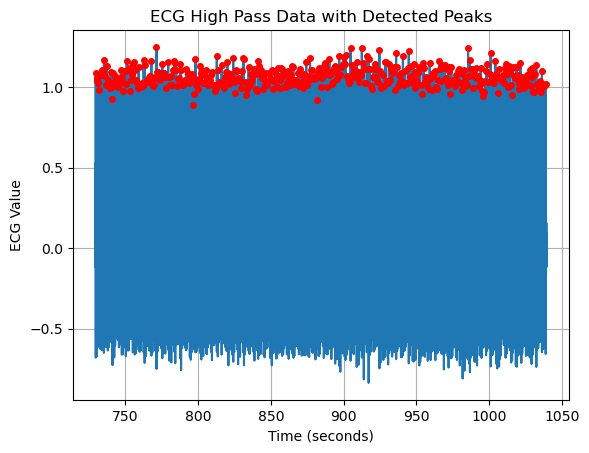

In [113]:
peak_threshold = 0.6 # Minimum value threshold for a peak (assuming High Pass data is scaled)
peak_distance_samples = int(0.2 / np.diff(time).mean())  # Minimum separation in samples

# Ensure peak_distance is at least 1 sample
peak_distance_samples = max(peak_distance_samples, 1)

# Find peaks using scipy.signal.find_peaks
peaks, _ = find_peaks(highpassed, height=peak_threshold, distance=peak_distance_samples)



# Plot interpolated ECG and detected peaks
# plt.figure(figsize=(100, 5))
plt.plot(time, highpassed)
plt.plot(time[peaks], highpassed[peaks], "ro", markersize=4)
plt.xlabel("Time (seconds)")
plt.ylabel("ECG Value")
plt.title("ECG High Pass Data with Detected Peaks")
plt.grid(True)
plt.show()

In [114]:
# Calculate time intervals between consecutive peaks
time_intervals = np.diff(time[peaks])

# Convert time intervals to heart rate (beats per minute)
heart_rate = 60 / time_intervals

# Calculate mean heart rate
mean_heart_rate = heart_rate.mean()

print(f"Mean Heart Rate: {mean_heart_rate:.2f} beats per minute")


Mean Heart Rate: 91.94 beats per minute
